In [ ]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

nx_draw = lambda g: nx.draw_kamada_kawai(g, with_labels=True)

### Create the Sequential Stohastic Gradient Descent Algorithm

In [ ]:
def seqgd(Y, r: int, e: float, l: float=1e-5):
    """
    The sequential gradient descent algorithm.
    Parameters:
      Y: the adjancency matrix.
      r: the rank.
      e: the accuracy.
      l: lambda value.
    Returns: Z
    """
    n = Y.shape[0]
    Z = np.random.rand(n, r)
    t = 1
    indices = np.transpose(np.where(Y != 0))
    graph_edges = [tuple(idx) for idx in indices]

    while True:
        Z_prev = Z.copy()
        for i, j in graph_edges:
            h = 1 / np.sqrt(t)
            t += 1
            Z[i] += h * (((Y[i, j] - np.dot(Z[i], Z[j])) * Z[j]) + (l * Z[i]))
        diff = np.linalg.norm(Z - Z_prev, 'fro') ** 2
        print(diff)
        if diff <= e:
            return Z

### Utility Functions

In [ ]:
def plot_res(Y, ZZt):
    """
    Plots the ZZt values and adds corresponding colors of
    0 and 1 according to adjancency matrix Y.
    Parameters:
      Y: the original adjancency matrix.
      ZZt: the dot product of Z and Zt, where Z the result of algorithm 1 for Y.
    """
    zeros = ZZt[np.where(Y == 0)]
    ones = ZZt[np.where(Y != 0)]
    ones_min, ones_max = np.min(ones),  np.max(ones)
    zeros_min, zeros_max = np.min(zeros), np.max(zeros)

    fig, ax = plt.subplots()

    ax.scatter(zeros, np.zeros_like(zeros), color='red', label='0')
    ax.scatter(ones, np.ones_like(ones), color='blue', label='1')

    ax.legend()
    ax.grid(True)

    plt.xticks(ticks=[ones_min, ones_max])
    plt.show()

In [ ]:
def is_symmetric(Y):
    """ Function to check if adjancency matrix Y is symmetric (returns True if so). """
    return np.array_equal(Y, Y.T)

In [ ]:
def print_range(Y, Z):
    """Prints the min and max values of Z where 1s and 0s should be (according to Y)."""
    ZZt = np.dot(Z, Z.T)
    ones = ZZt[np.where(Y != 0)]
    ones_min, ones_max = np.min(ones), np.max(ones)
    print("Ones Range: ")
    print(ones_min, ones_max)
    print("Zeros Range: ")
    zeros = ZZt[np.where(Y == 0)]
    zeros_min, zeros_max = np.min(zeros), np.max(zeros)
    print(zeros_min, zeros_max)

In [ ]:
def filter_convert(Y, Z):
    """Converts the values close to the real 1s range to 1 and the rest to 0."""
    ZZt = np.dot(Z, Z.T)
    ones = ZZt[np.where(Y != 0)]
    ones_min, ones_max = np.min(ones),  np.max(ones)
    return np.where((ZZt >= ones_min) & (ZZt <= ones_max), 1, 0)  # filter

In [ ]:
def calc_diff(Y, Z=None, Z_test=None):
    """Calculates the difference between Z (or Z_test = the filtered matrix) and Y."""
    if Z is None and Z_test is None:
        raise ValueError("No input Z.")
    if Z_test is None:
        Z_test = filter_convert(Y, Z)
    num_diff = np.sum(Y != Z_test)
    percentage_diff = (num_diff / (Y.shape[0] * Y.shape[1])) * 100
    print(f"Percentage of differences: {percentage_diff:.2f}%")

### Test the Algorithm

Test with custom random graph:

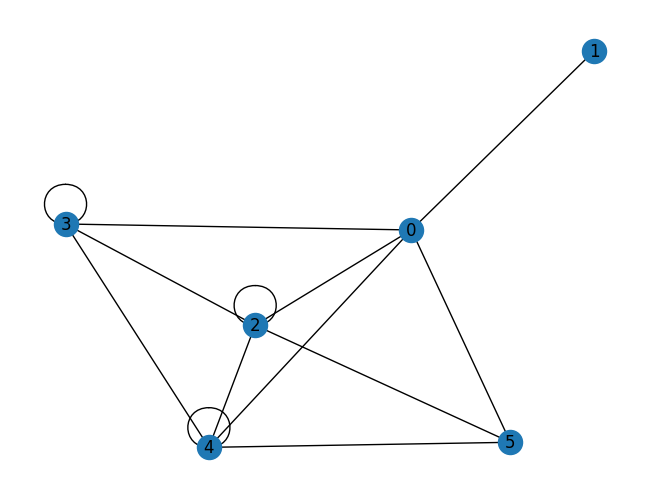

In [ ]:
n = 6
Y = np.random.rand(n, n)
# make 0 and 1 array (optional):
Y[Y < 0.5] = 0
Y[Y >= 0.5] = 1

Y = np.maximum(Y, Y.T)  # make Y symmetric.

# print(Y)
nx_draw(nx.Graph(Y, nodetype=int))

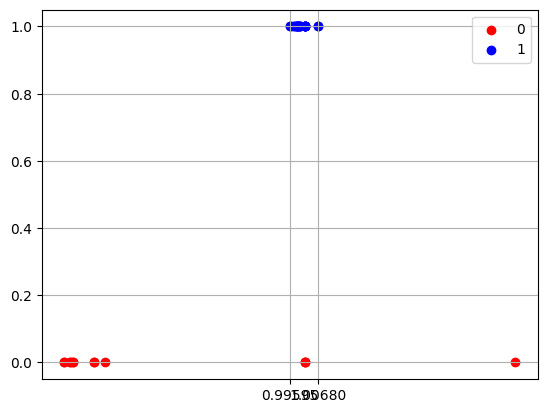

In [ ]:
Z = seqgd(Y, 2, 1e-10, 1e-5)
print(Z)
plot_res(Y, np.dot(Z, Z.T))

In [ ]:
print_range(Y, Z)

Ones Range: 
0.99595329 1.0067994
Zeros Range: 
0.90738347 1.08426117


Print difference percentage of ZZt with original Y:

In [ ]:
calc_diff(Y, Z)

Percentage of differences: 8.33%


Run many experiments for better approximation of adjacency Y:

In [ ]:
def calc_manyZ(num_exp=3, rank=2, acc=1e-10, lamd=1e-5):
    l = []
    for i in range(num_exp):
        Z = seqgd(Y, rank, acc, lamd)
        Z_test = filter_convert(Y, Z)
        l.append(Z_test)
    avg = sum(l) / len(l)
    avg = np.where((avg < 1), 0, 1)  # filter
    print(avg)
    return l, avg

Z_test = calc_manyZ()
calc_diff(Y, Z_test=Z_test[1])

Streaming output truncated to the last 5000 lines.
8.430860668399919e-10
8.413789540777713e-10
8.396765648460588e-10
8.379788825655493e-10
8.362858906883508e-10
8.345975728096923e-10
8.329139125222207e-10
8.312348935340409e-10
8.295604995769975e-10
8.278907144954147e-10
8.262255222040602e-10
8.245649066461579e-10
8.229088518711851e-10
8.212573419775574e-10
8.196103611207743e-10
8.179678935479579e-10
8.163299235668902e-10
8.146964355429269e-10
8.130674139122204e-10
8.114428431665313e-10
8.098227078830944e-10
8.08206992698936e-10
8.065956822969406e-10
8.049887614394961e-10
8.033862149516905e-10
8.017880277262216e-10
8.001941847172697e-10
7.986046709296256e-10
7.970194714455037e-10
7.954385714044602e-10
7.938619560180321e-10
7.922896105351458e-10
7.907215202950234e-10
7.89157670676264e-10
7.875980471390529e-10
7.860426351615544e-10
7.844914203527727e-10
7.829443883158394e-10
7.814015247448531e-10
7.798628153992458e-10
7.783282460601562e-10
7.767978026204608e-10
7.752714709981085e-10
7.737

Test with Social Network Graph:

In [ ]:
!wget https://snap.stanford.edu/data/facebook_combined.txt.gz
!gunzip facebook_combined.txt.gz

--2023-12-15 07:39:25--  https://snap.stanford.edu/data/facebook_combined.txt.gz
Resolving snap.stanford.edu (snap.stanford.edu)... 171.64.75.80
Connecting to snap.stanford.edu (snap.stanford.edu)|171.64.75.80|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 218576 (213K) [application/x-gzip]
Saving to: ‘facebook_combined.txt.gz’

facebook_combined.t 100%[===================>] 213.45K   436KB/s    in 0.5s    

2023-12-15 07:39:26 (436 KB/s) - ‘facebook_combined.txt.gz’ saved [218576/218576]



In [ ]:
G = nx.read_edgelist('facebook_combined.txt')
Y = nx.to_numpy_array(G)  # Y is symmetric because of Facebook friends.
# print(is_symmetric(Y)) # prints True.
Z = seqgd(Y, 10, 1e-5)
# plot_res(Y, np.dot(Z, Z.T))

435.58156832650826
12.84834309769273
4.441278460581134
2.2213139399761883
1.3227079313264516
0.8730887479964031
0.6171217108936011
0.4580704791065237
0.35275885545237173
0.27957691009704605
0.22674851708294272
0.18741949826593962
0.1573849011753129
0.1339514924735569
0.11533113186148172
0.10029984490111306
0.087997578021916
0.0778060689032944
0.0692718939251816
0.06205658186471109
0.055903452409615514
0.0506150753957887
0.04603764048576331
0.042049922237679636
0.03855536173011108
0.03547629981310074
0.03274972012675532
0.03032406736117045
0.028156841817043185
0.02621276153711995
0.0244623442612826
0.022880803292234374
0.021447180450176122
0.020143659782482413
0.0189550202938719
0.017868196481347343
0.016871923115438798
0.015956446337684026
0.015113287319214644
0.014335047848813887
0.013615249574655973
0.012948200414466145
0.012328883019587742
0.011752861235088907
0.011216201317878345
0.010715405314874953
0.010247354505961459
0.009809261213478821
0.009398627595270893
0.00901321028992014

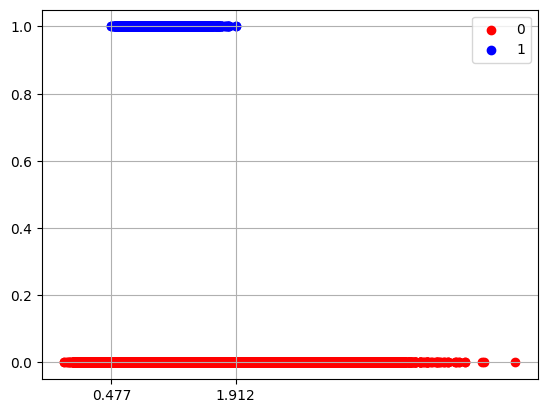

In [ ]:
plot_res(Y, np.dot(Z, Z.T))

### Applications

Function for friend recommendation:

In [ ]:
def recommend_close_friends(A):
    """
    Recommends potential close friends in a social network based on adjacency matrix.
    Parameters:
      A: the adjacency matrix representing connections in a social network.
    Returns:
      rec: Matrix containing recommendations for potential close friends. Each row suggests connections for the corresponding user/node.
    """
    rec = np.zeros(A.shape)
    for i in range(A.shape[0]):
        friends = np.where(A[i] != 0)[0]  # friends of user i
        rec[i] = np.sum(A[friends], axis=0)
        rec[i, np.append(friends, i)] = 0
    rec = np.where(rec > 1 , 1, rec)
    return rec

Example run for Facebook friends graph:

In [ ]:
G = nx.read_edgelist('facebook_combined.txt')
A = nx.to_numpy_array(G)

Z = seqgd(A, 10, 1e-5)
ZZt = np.dot(Z,Z.T)

# plot_res(A, ZZt)

ones = ZZt[np.where(A != 0)]
ones_min, ones_max = np.min(ones),  np.max(ones)
Z_test = np.where((ZZt >= ones_min) & (ZZt <= ones_max), 1, 0)  # filter

recA = recommend_close_friends(A)
recZ = recommend_close_friends(Z_test)

num_diff = np.sum(recA != recZ)

percentage_diff = (num_diff / (recA.shape[0] * recA.shape[1])) * 100

print(f"Percentage of differences: {percentage_diff:.2f}%")

Percentage of differences: 17.80%
